In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

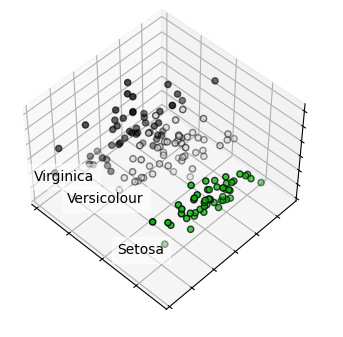

In [2]:
# to jest zabrane ze strony scipy z tego co pamiętam

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


pca = PCA(n_components=3)
#print(pca)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])


In [3]:
#własna implementacja algorytmu PCA

def wiPCA(X, n_components):

  #0. Konwersja danych do macierzy numpy
  X_data = X.data
  #1. średnia kolumn
  #2. odejmujemy średnią od każdej kolumn
  X_meaned = X_data - np.mean(X_data , axis = 0)
  #3. liczymy kowariancję
  cov_mat = np.cov(X_meaned.T)
  #print(cov_mat)

  #4. liczymy eig (zwraca v_ww oraz m_ww)
  #eigenvectors{(…, M, M) ndarray, (…, M, M) matrix}
  #The column eigenvectors[:, i] is the normalized eigenvector corresponding to the eigenvalue eigenvalues[i]. Will return a matrix object if a is a matrix object.
  eigenvalues , eigenvectors = np.linalg.eigh(cov_mat)

  #print(eigen_values)
  #print(eigenvectors)

  #5. sortujemy malejąco
  sorted_index = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalues = eigenvalues[sorted_index]
  sorted_eigenvectors = eigenvectors[:,sorted_index]


  #6. przycinamy wektory (wektory, nie eigenvalues)
  eigenvalue_subset = sorted_eigenvalues[0:n_components]
  eigenvector_subset = sorted_eigenvectors[:,0:n_components]

  #7. rzutujemy wartości (kopia macierzy) x m_ww (przycięte)
    #te dwie linijki poniżej robią dokladnie to samo
  X_reduced = np.dot(X_meaned,eigenvector_subset)
  #X1_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()
  #print(X_reduced == X1_reduced)
  return X_reduced, X_meaned, eigenvalues, eigenvectors, sorted_eigenvalues, sorted_eigenvectors, eigenvalue_subset, eigenvector_subset




 0.720370726364933 [ 0.10877959 -0.99406589]

 1.2889425352591235 [-0.99406589 -0.10877959]


 1.2889425352591235 [-0.99406589 -0.10877959]

 0.720370726364933 [ 0.10877959 -0.99406589]

 [1.28894254]

 [[-0.99406589]
 [-0.10877959]]

 (200, 2)

 (200, 1)
(200, 2)


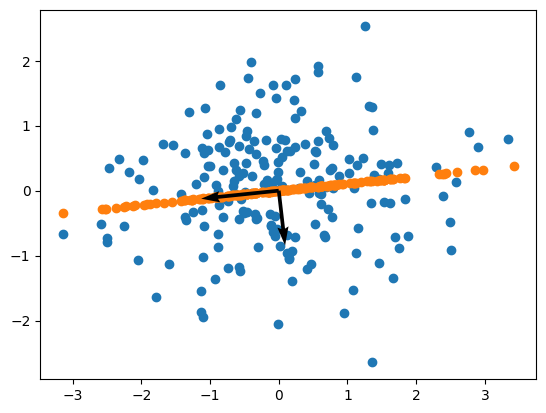

In [5]:
data = np.array(np.random.randn(200, 2))
#print(data.shape)
plt.scatter(data[:,0], data[:,1])


reduced_data, means, evalues, evectors, s_evalues, s_evectors, sub_evalues, sub_evectors = wiPCA(data, 1)
#print(reduced_data)
#print(means)
print('\n',evalues[0], evectors[:,0])
print('\n',evalues[1], evectors[:,1])
#print('\n',evectors)

print('\n\n',s_evalues[0], s_evectors[:,0])
print('\n',s_evalues[1], s_evectors[:,1])

#co potwierdza że krok 5 działa poprawnie
#wektory są posortowane malejąco, największy wektor to PC1, najmniejszy to PCn

print('\n',sub_evalues) #przycięte oczywiście
print('\n',sub_evectors)
#m_ww x v_ww
vectors = evectors * np.sqrt(evalues)

print('\n',data.shape)
print('\n',reduced_data.shape)
data_wykresy = np.dot(reduced_data, sub_evectors.T)
origin = [0.0 , 0.0]

print(data_wykresy.shape)
plt.scatter(data_wykresy[:,0], data_wykresy[:,1])
#print('\n',reduced_data)
plt.quiver(origin, origin, vectors[0], vectors[1], angles='xy', scale_units='xy', scale=1)
plt.savefig("pca")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


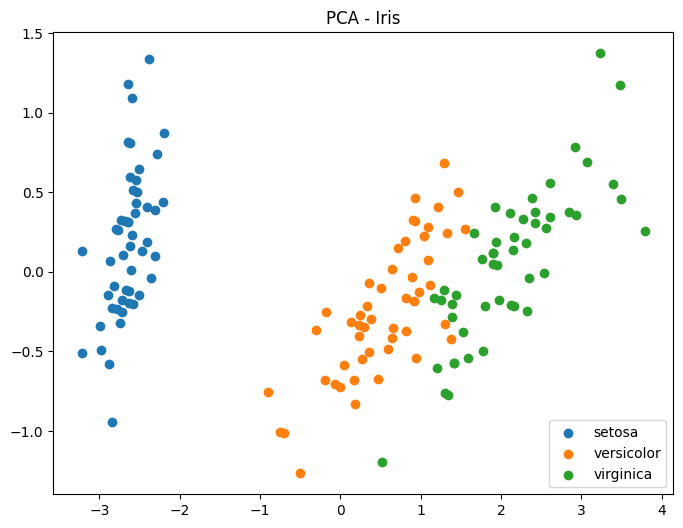

In [6]:
X = datasets.load_iris()
#print(X)
reduced_data, means, evalues, evectors, s_evalues, s_evectors, sub_evalues, sub_evectors  = wiPCA(X, n_components=2)

# Etykiety klas (gatunków irysów)
labels = X.target
print(labels)
#print(reduced_data)
#print(X.target, X.target_names)
l = dict(zip(np.unique(X.target),X.target_names))
print(l)
#Rysowanie wykresu
plt.figure(figsize=(8, 6))


# Tworzenie wykresu punktowego, oznaczając różne klasy różnymi kolorami
for label in np.unique(labels):
    plt.scatter(-reduced_data[labels == label, 0], reduced_data[labels == label, 1], label=f'{l[label]}')

plt.legend()
plt.title('PCA - Iris')
plt.savefig("pca-iris")
plt.show()

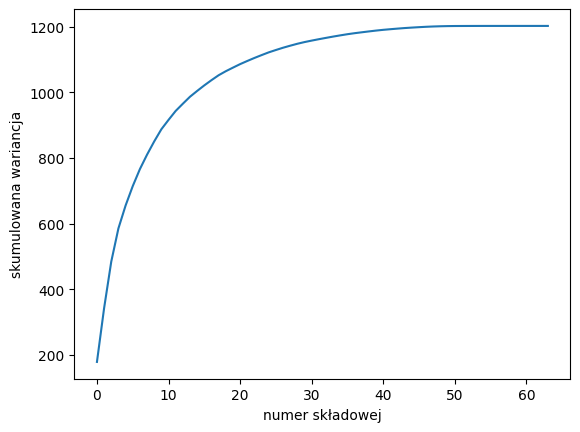

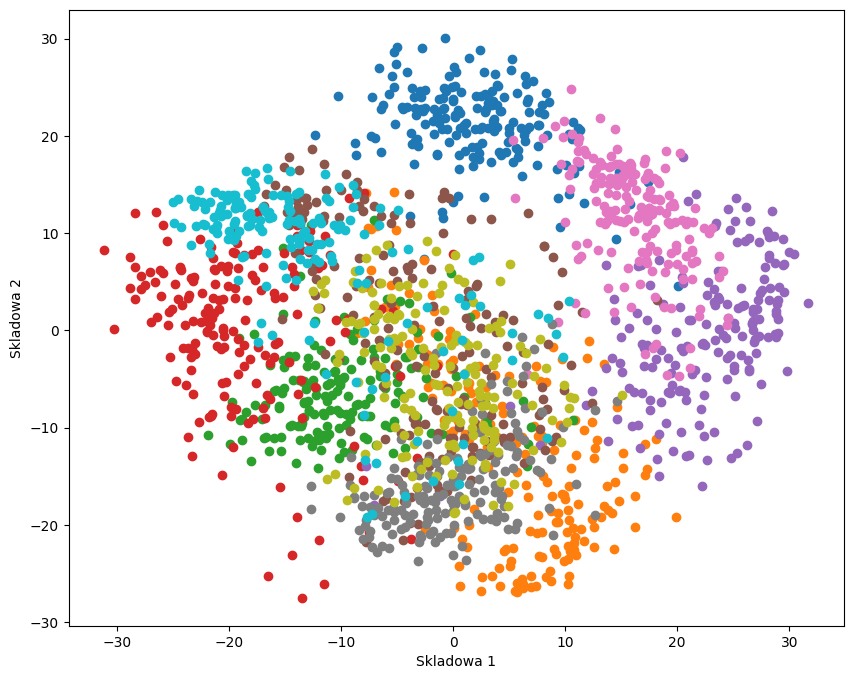

In [7]:
digits = datasets.load_digits()

reduced_data, means, evalues, evectors, s_evalues, s_evectors, sub_evalues, sub_evectors  = wiPCA(digits, n_components=2)
#print(reduced_data)

# Explained variance_ratio
#ratio = v_ww/np.sum(v_ww)
# explained variance to posortowane eigenvalues
plt.plot(np.cumsum(s_evalues))
plt.xlabel("numer składowej")
plt.ylabel("skumulowana wariancja")
plt.savefig("krzywa wariancji")

X = digits.data
Y = digits.target

#print(Y)

#pca = PCA(n_components=2)
#reduced_data = pca.fit_transform(X)


plt.figure(figsize=(10, 8))
#a = plt.get_cmap(name='inferno', lut=len(np.unique(Y)))

for i in range(len(np.unique(Y))):
    plt.scatter(reduced_data[Y == i, 0], -reduced_data[Y == i, 1])

plt.xlabel("Skladowa 1")
plt.ylabel("Skladowa 2")
plt.savefig("elementy zbioru")
#plt.colorbar()